# Proyecto final - DataXperience - Luis Fernando Rodriguez Triana

# PARTE 1


# Introducción


El conjunto de datos seleccionados recopila informacion sobre los medicamentos vitales no disponibles, ya sea por que no se encuentran los medicamentos en el pais, o por que las cantidades no son suficioentes.

El link a los datos es: https://www.datos.gov.co/Salud-y-Protecci-n-Social/MEDICAMENTOS-VITALES-NO-DISPONIBLES/sdmr-tfmf/about_data

En los contenidos del conjunto encontramos datos como la cantidad solicitada, nombre comercial, concentración, principal activo y unidad de medida.

Con estos datos responderemos las siguientes preguntas:

. ¿La tendencia en medicamentos vitales no disponibles mejora o empeora?

. ¿La pandemia a producido una mejora en el sistema?

. ¿Que razones pueden estar detras de la tendencia en escazes de medicamentos?

La eleccion de estos datos, se debe a su relevancia para Colombia estos ultimos años, y por que representa lo que seria un caso comun de estudio de datos para dar una respuesta a una problematica.

# Carga y revision de datos


In [15]:
###Impoprtar herramientas###

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

from google.colab import files

uploaded = files.upload()


df = pd.read_csv("MEDICAMENTOS_VITALES_NO_DISPONIBLES_20250905.csv")

###Ver las primeras filas###
df.head()

Saving MEDICAMENTOS_VITALES_NO_DISPONIBLES_20250905.csv to MEDICAMENTOS_VITALES_NO_DISPONIBLES_20250905 (1).csv


,FECHA_DE_AUTORIZACIÓN,TIPO_DE_SOLICITUD,SOLICITANTE/IMPORTADOR,IUM,PRINCIPIO_ACTIVO1,CONCENTRACIÓN_DELMEDICAMENTO1,UNIDAD_MEDIDA1,PRINCIPIO_ACTIVO2,CONCENTRACIÓN_DEL_MEDICAMENTO2,UNIDAD_MEDIDA2,FORMA_FARMACÉUTICA,NOMBRE_COMERCIAL_,CANTIDAD_SOLICITADA,PRESENTACIÓN_COMERCIAL,DIAGNOSTICO_CIE-1NO REPORTA,CÓDIGO_DIAGNOSTICO_CIE-10
0,2025 Aug 06 05:00:00 AM,MÁS DE UN PACIENTE,PISA FARMACÉUTICA DE COLOMBIA S.A.,1L1005651000100,LIDOCAÍNA CLORHIDRATO,10,mg/mL,NO APLICA,NO APLICA,NO APLICA,SOLUCIÓN INYECTABLE,PISACAÍNA,"15,180",CAJAS X UN FRASCO AMPULA X 50 mL,ANESTESIA DE LA PIEL,R200
1,2025 Aug 06 05:00:00 AM,MÁS DE UN PACIENTE,PISA FARMACÉUTICA DE COLOMBIA S.A.,1B1024501002100,BUPIVACAINA CLORHIDRATO,5,mg/mL,NO APLICA,NO APLICA,NO APLICA,SOLUCIÓN INYECTABLE,BUVACAINA,"24,353",CAJAS CON UNA (1) AMPOLLETA X 10 mL,ANESTÉSICO,NO REPORTADO
2,2025 Aug 06 05:00:00 AM,MÁS DE UN PACIENTE,AVALON PHARMACEUTICAL SA,1H1027911001100,VACUNA HEPATITIS B –VIRUS INACTIVADO- ANTÍGENO...,20,µg/Dosis (1ml),NO APLICA,NO APLICA,NO APLICA,SUSPENSION INYECTABLE,REVAC- B+,"1,171",CAJA X (1) VIAL DE 1 ml.,NO REPORTADO,NO REPORTADO
3,2025 Aug 06 05:00:00 AM,MÁS DE UN PACIENTE,AVALON PHARMACEUTICAL SA,1H1027911001100,VACUNA HEPATITIS B –VIRUS INACTIVADO- ANTÍGENO...,20,µg/Dosis (1ml),NO APLICA,NO APLICA,NO APLICA,SUSPENSION INYECTABLE,REVAC- B+,"14,359",CAJA X (1) VIAL DE 1 ml.,NO REPORTADO,NO REPORTADO
4,2025 Aug 06 05:00:00 AM,MÁS DE UN PACIENTE,HOLLAND GROUP SAS,1T1024151013100,TRINITRATO DE GLICEROL,5,mg/mL,NO APLICA,NO APLICA,NO APLICA,SOLUCIÓN INYECTABLE,NITROCAN 50,"1,600",CAJAS X 5 AMPOLLAS X 10 mL,"ANGINA DE PECHO, NO ESPECIFICADA",I209


In [16]:
###filas, columnas##3
print(df.shape)

###Nombre de las columnas###
print(df.columns)

###tipos de datos, nulos###
df.info()

###Estadísticas rápidas###
df.describe()

(8942, 16)
Index(['FECHA_DE_AUTORIZACIÓN', 'TIPO_DE_SOLICITUD', 'SOLICITANTE/IMPORTADOR',
       'IUM', 'PRINCIPIO_ACTIVO1', 'CONCENTRACIÓN_DELMEDICAMENTO1',
       'UNIDAD_MEDIDA1', 'PRINCIPIO_ACTIVO2', 'CONCENTRACIÓN_DEL_MEDICAMENTO2',
       'UNIDAD_MEDIDA2', 'FORMA_FARMACÉUTICA', 'NOMBRE_COMERCIAL_',
       'CANTIDAD_SOLICITADA', 'PRESENTACIÓN_COMERCIAL',
       'DIAGNOSTICO_CIE-1NO REPORTA', 'CÓDIGO_DIAGNOSTICO_CIE-10'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8942 entries, 0 to 8941
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   FECHA_DE_AUTORIZACIÓN           8942 non-null   object
 1   TIPO_DE_SOLICITUD               8942 non-null   object
 2   SOLICITANTE/IMPORTADOR          8939 non-null   object
 3   IUM                             8939 non-null   object
 4   PRINCIPIO_ACTIVO1               8942 non-null   object
 5   CONCENTRACIÓN_DE

,FECHA_DE_AUTORIZACIÓN,TIPO_DE_SOLICITUD,SOLICITANTE/IMPORTADOR,IUM,PRINCIPIO_ACTIVO1,CONCENTRACIÓN_DELMEDICAMENTO1,UNIDAD_MEDIDA1,PRINCIPIO_ACTIVO2,CONCENTRACIÓN_DEL_MEDICAMENTO2,UNIDAD_MEDIDA2,FORMA_FARMACÉUTICA,NOMBRE_COMERCIAL_,CANTIDAD_SOLICITADA,PRESENTACIÓN_COMERCIAL,DIAGNOSTICO_CIE-1NO REPORTA,CÓDIGO_DIAGNOSTICO_CIE-10
count,8942,8942,8939,8939,8942,8903,8844,8921,8923,8921,8907,8941,8884,8905,8942,8942
unique,1366,3,286,1172,547,192,51,21,20,8,71,756,1114,1038,632,546
top,2025 Jun 19 05:00:00 AM,PACIENTE ESPECIFICO,AUDIFARMA S.A.,1A1000141000100,ATALUREN,50,mg,NO APLICA,NO APLICA,NO APLICA,SOLUCIÓN INYECTABLE,TRANSLARNA,6,CAJAS X 30 SOBRES,NO REPORTADO,NO REPORTADO
freq,51,4995,1389,489,854,793,4385,8094,8106,8107,2848,852,1216,677,1235,1537


# Limpieza de datos

In [17]:
df = df.drop_duplicates()

columnas_clave = ["CANTIDAD_SOLICITADA", "CONCENTRACIÓN_DELMEDICAMENTO1", "UNIDAD_MEDIDA1"]
columnas_opcionales = ["PRINCIPIO_ACTIVO2", "CONCENTRACIÓN_DEL_MEDICAMENTO2",
                       "UNIDAD_MEDIDA2", "FORMA_FARMACÉUTICA", "NOMBRE_COMERCIAL_",
                       "PRESENTACIÓN_COMERCIAL"]

###Rellenar columnas opcionales###
df[columnas_opcionales] = df[columnas_opcionales].fillna("N/A")

###Rellenar CANTIDAD_SOLICITADA con 0 si está vacío###
df["CANTIDAD_SOLICITADA"] = df["CANTIDAD_SOLICITADA"].fillna(0)

###Eliminar filas que NO tengan ninguna información en columnas clave###
filas_antes = df.shape[0]
df = df.dropna(subset=columnas_clave, how="all")
filas_despues = df.shape[0]

###imprimir resultado###
print("\nLimpieza realizada.")
print(f"Filas eliminadas: {filas_antes - filas_despues}")
print(f"Filas finales: {df.shape[0]}")

print("\nValores nulos después de limpieza:\n")
print(df.isnull().sum())

###Guardar dataset###
df.to_csv("datos_medicamentos_vitales_limpios.csv", index=False)
print("\nArchivo guardado como 'datos_medicamentos_vitales_limpios.csv'")



Limpieza realizada.
Filas eliminadas: 0
Filas finales: 8435

Valores nulos después de limpieza:

FECHA_DE_AUTORIZACIÓN              0
TIPO_DE_SOLICITUD                  0
SOLICITANTE/IMPORTADOR             3
IUM                                3
PRINCIPIO_ACTIVO1                  0
CONCENTRACIÓN_DELMEDICAMENTO1     39
UNIDAD_MEDIDA1                    97
PRINCIPIO_ACTIVO2                  0
CONCENTRACIÓN_DEL_MEDICAMENTO2     0
UNIDAD_MEDIDA2                     0
FORMA_FARMACÉUTICA                 0
NOMBRE_COMERCIAL_                  0
CANTIDAD_SOLICITADA                0
PRESENTACIÓN_COMERCIAL             0
DIAGNOSTICO_CIE-1NO REPORTA        0
CÓDIGO_DIAGNOSTICO_CIE-10          0
dtype: int64

Archivo guardado como 'datos_medicamentos_vitales_limpios.csv'


Transformar fechas

In [18]:

if "FECHA_DE_AUTORIZACIÓN" in df.columns:
    df["FECHA_DE_AUTORIZACIÓN"] = pd.to_datetime(
        df["FECHA_DE_AUTORIZACIÓN"],
        errors="coerce",
        infer_datetime_format=True
    )
    print("Columna 'FECHA_DE_AUTORIZACIÓN' convertida a formato fecha.")
    print("\nPrimeros valores convertidos:")
    print(df["FECHA_DE_AUTORIZACIÓN"].head())
else:
    print("No existe la columna 'FECHA_DE_AUTORIZACIÓN' en el archivo.")

df.to_csv("datos_medicamentos_vitales_limpios_con_fecha.csv", index=False)
print("\nArchivo guardado como 'datos_medicamentos_vitales_limpios_con_fecha.csv'")


Columna 'FECHA_DE_AUTORIZACIÓN' convertida a formato fecha.

Primeros valores convertidos:
0   2025-08-06 05:00:00
1   2025-08-06 05:00:00
2   2025-08-06 05:00:00
3   2025-08-06 05:00:00
4   2025-08-06 05:00:00
Name: FECHA_DE_AUTORIZACIÓN, dtype: datetime64[ns]

Archivo guardado como 'datos_medicamentos_vitales_limpios_con_fecha.csv'


/tmp/ipython-input-1040492410.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["FECHA_DE_AUTORIZACIÓN"] = pd.to_datetime(


# PARTE 2

# Calcular e interpretar medidas de tendencia central (media, mediana, moda).

In [19]:

###seleccionar columnas relevantes###
columnas_relevantes = ["CONCENTRACIÓN_DELMEDICAMENTO1",
                       "CONCENTRACIÓN_DEL_MEDICAMENTO2",
                       "CANTIDAD_SOLICITADA"]

###convertirlas a números###
for col in columnas_relevantes:
    df[col] = pd.to_numeric(df[col], errors="coerce")

###Crear un DataFrame con solo esas columnas###
df_numericas = df[columnas_relevantes]

print("Columnas que se analizarán:", df_numericas.columns.tolist())

###Calcular estadísticas###
print("\nMEDIA:\n", df_numericas.mean())
print("\nMEDIANA:\n", df_numericas.median())
moda = df_numericas.mode()
print("\nMODA:\n", moda.iloc[0] if not moda.empty else "No se encontró moda")

Columnas que se analizarán: ['CONCENTRACIÓN_DELMEDICAMENTO1', 'CONCENTRACIÓN_DEL_MEDICAMENTO2', 'CANTIDAD_SOLICITADA']

MEDIA:
 CONCENTRACIÓN_DELMEDICAMENTO1     4505.617546
CONCENTRACIÓN_DEL_MEDICAMENTO2     117.451253
CANTIDAD_SOLICITADA                 68.308646
dtype: float64

MEDIANA:
 CONCENTRACIÓN_DELMEDICAMENTO1      50.0
CONCENTRACIÓN_DEL_MEDICAMENTO2    150.0
CANTIDAD_SOLICITADA                12.0
dtype: float64

MODA:
 CONCENTRACIÓN_DELMEDICAMENTO1      50.0
CONCENTRACIÓN_DEL_MEDICAMENTO2    150.0
CANTIDAD_SOLICITADA                 6.0
Name: 0, dtype: float64


# Calcular e interpretar medidas de dispersión (rango, varianza, desviación estándar).






In [20]:
###Seleccionar solo columnas relevantes numéricas###
columnas_relevantes = ["CONCENTRACIÓN_DELMEDICAMENTO1",
                       "CONCENTRACIÓN_DEL_MEDICAMENTO2",
                       "CANTIDAD_SOLICITADA"]

###Convertir a numéricas (si hay texto, se reemplaza por NaN)###
for col in columnas_relevantes:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df_numericas = df[columnas_relevantes]

###Calcular medidas de dispersión###
print("MEDIDAS DE DISPERSIÓN\n")

for col in df_numericas.columns:
    serie = df_numericas[col].dropna()
    if not serie.empty:
        rango = serie.max() - serie.min()
        varianza = serie.var()
        desviacion = serie.std()

        print(f" {col}:")
        print(f"   Rango: {rango}")
        print(f"   Varianza: {varianza}")
        print(f"   Desviación estándar: {desviacion}\n")
    else:
        print(f"{col} no tiene datos numéricos válidos.\n")

MEDIDAS DE DISPERSIÓN

 CONCENTRACIÓN_DELMEDICAMENTO1:
   Rango: 10000000.0
   Varianza: 40258994439.18937
   Desviación estándar: 200646.4413818231

 CONCENTRACIÓN_DEL_MEDICAMENTO2:
   Rango: 298.0
   Varianza: 2888.847690197868
   Desviación estándar: 53.74800173213762

 CANTIDAD_SOLICITADA:
   Rango: 999.0
   Varianza: 23551.893483393123
   Desviación estándar: 153.46626171049166



# Detectar outliers / analisis

In [21]:
###Seleccionar columnas numéricas###
df_numericas = df.select_dtypes(include=["number"])

if df_numericas.empty:
    print("No hay columnas numéricas en el archivo.")
else:
    print(f"Columnas numéricas detectadas: {df_numericas.columns.tolist()}\n")

    ###Detectar outliers usando IQR###
    outliers = {}
    for col in df_numericas.columns:
        Q1 = df_numericas[col].quantile(0.25)
        Q3 = df_numericas[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        ###Filtrar filas que estén fuera de los límites###
        outliers_col = df[(df_numericas[col] < limite_inferior) | (df_numericas[col] > limite_superior)]
        outliers[col] = outliers_col

        print(f"{col}: {len(outliers_col)} outliers detectados")
        print(f"    Rango permitido: [{limite_inferior}, {limite_superior}]")
        print()


Columnas numéricas detectadas: ['CONCENTRACIÓN_DELMEDICAMENTO1', 'CONCENTRACIÓN_DEL_MEDICAMENTO2', 'CANTIDAD_SOLICITADA']

CONCENTRACIÓN_DELMEDICAMENTO1: 864 outliers detectados
    Rango permitido: [-211.74999999999997, 383.04999999999995]

CONCENTRACIÓN_DEL_MEDICAMENTO2: 1 outliers detectados
    Rango permitido: [-37.5, 262.5]

CANTIDAD_SOLICITADA: 970 outliers detectados
    Rango permitido: [-52.5, 103.5]



Gracias a la deteccion de outliers podemos evidenciar:

. Que en las concentracciones de medicamentos y en la cantidad solicitada hay una alta cantidad de outliers

. En la concentracion del medicamento es espereable ver grandes variaciones entre medicamentos con pricnipios activos en concentraciones altas y otros en concentraciones bajas.

# PARTE 3

# Graficacion mediante Boxplot

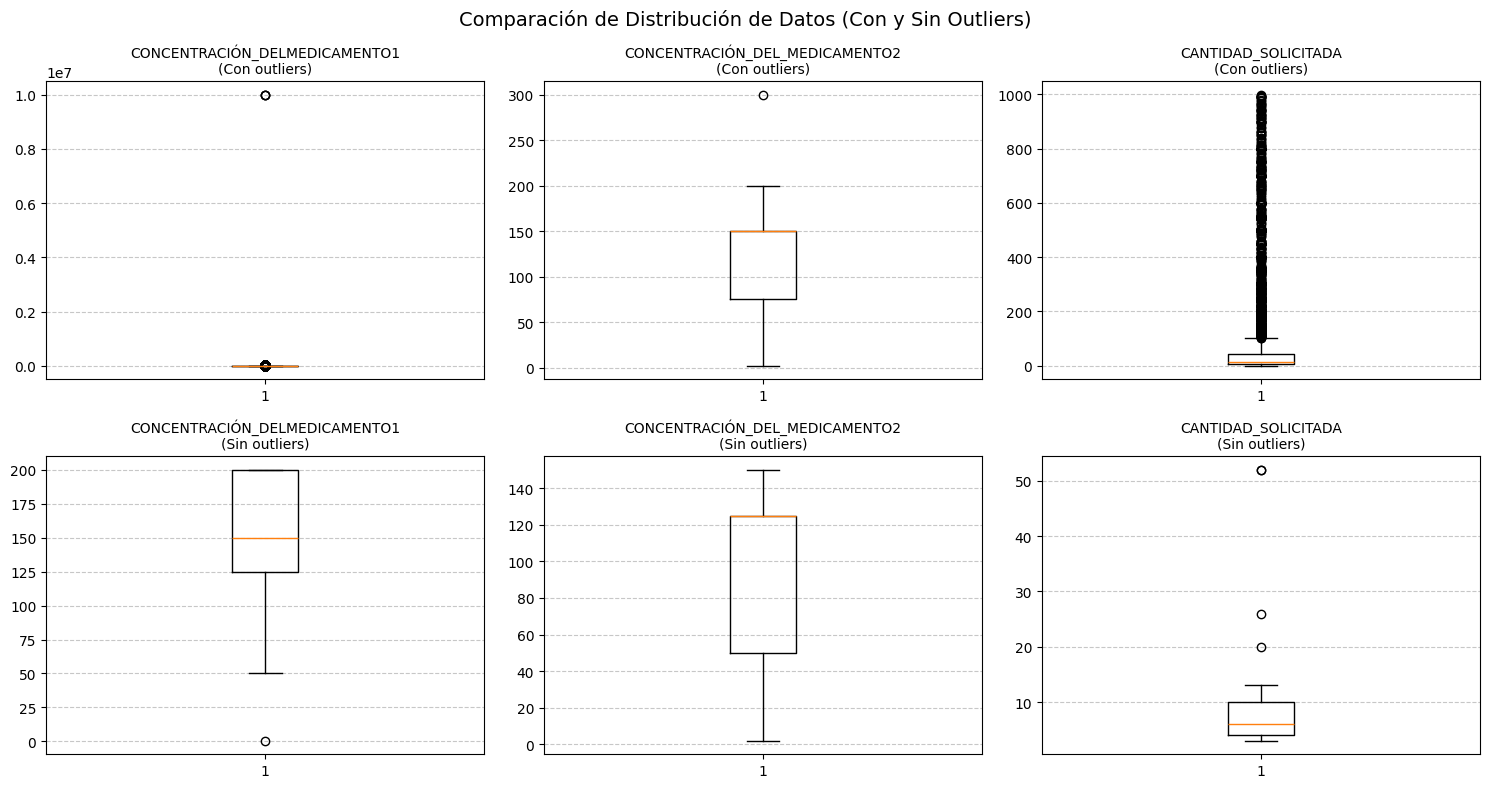

In [22]:


###Columnas numéricas relevantes###
columnas = ["CONCENTRACIÓN_DELMEDICAMENTO1", "CONCENTRACIÓN_DEL_MEDICAMENTO2", "CANTIDAD_SOLICITADA"]

###Convertir a numéricas###
for col in columnas:
    df[col] = pd.to_numeric(df[col], errors="coerce")

###Función para eliminar outliers usando IQR###
def eliminar_outliers_iqr(df, columnas):
    df_filtrado = df.copy()
    for col in columnas:
        Q1 = df_filtrado[col].quantile(0.25)
        Q3 = df_filtrado[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        df_filtrado = df_filtrado[(df_filtrado[col] >= limite_inferior) & (df_filtrado[col] <= limite_superior)]
    return df_filtrado

###Crear dataset sin outliers###
df_sin_outliers = eliminar_outliers_iqr(df, columnas)

###Graficar comparación###
fig, axes = plt.subplots(2, len(columnas), figsize=(15, 8))

for i, col in enumerate(columnas):
    ###Con outliers###
    axes[0, i].boxplot(df[col].dropna(), vert=True)
    axes[0, i].set_title(f"{col}\n(Con outliers)", fontsize=10)
    axes[0, i].grid(axis="y", linestyle="--", alpha=0.7)

    ###Sin outliers###
    axes[1, i].boxplot(df_sin_outliers[col].dropna(), vert=True)
    axes[1, i].set_title(f"{col}\n(Sin outliers)", fontsize=10)
    axes[1, i].grid(axis="y", linestyle="--", alpha=0.7)

fig.suptitle("Comparación de Distribución de Datos (Con y Sin Outliers)", fontsize=14)
plt.tight_layout()
plt.show()

# Graficacion comparativa a lo largo del tiempo

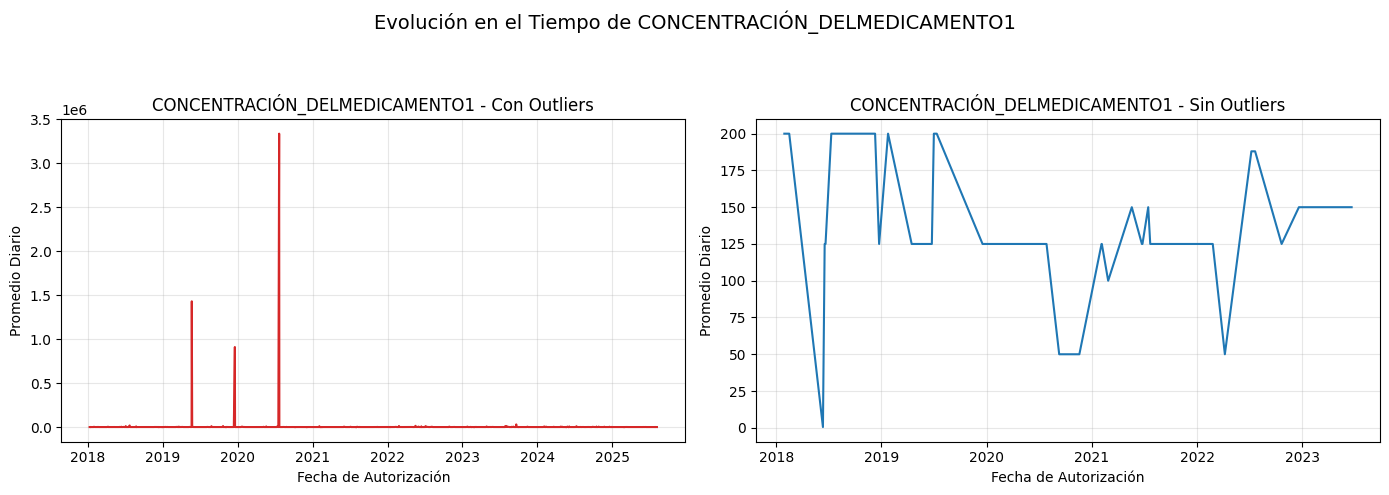

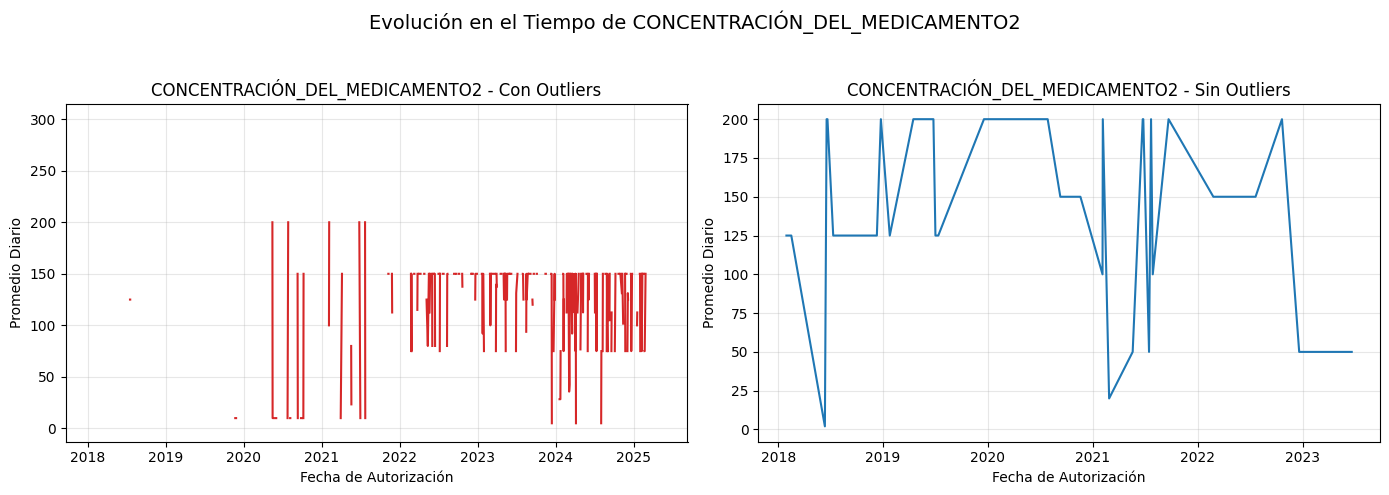

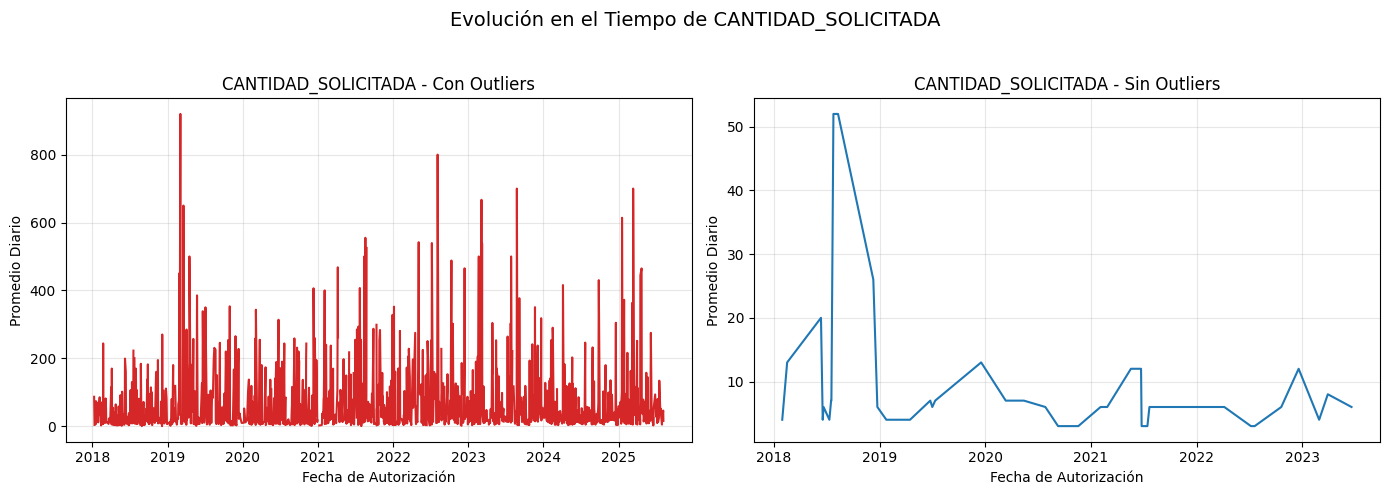

In [23]:
###Asegurar que la fecha está en datetime###
df['FECHA_DE_AUTORIZACIÓN'] = pd.to_datetime(df['FECHA_DE_AUTORIZACIÓN'], errors='coerce')

###Identificar y remover outliers usando el método IQR###
df_clean = df.copy()
numeric_cols = ['CONCENTRACIÓN_DELMEDICAMENTO1', 'CONCENTRACIÓN_DEL_MEDICAMENTO2', 'CANTIDAD_SOLICITADA']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

###Agrupar por fecha (promedio diario)###
df_time = df.groupby('FECHA_DE_AUTORIZACIÓN')[numeric_cols].mean()
df_time_clean = df_clean.groupby('FECHA_DE_AUTORIZACIÓN')[numeric_cols].mean()

###Generar gráficas individuales###
for col in numeric_cols:
    plt.figure(figsize=(14, 5))

    ###Gráfico con outliers###
    plt.subplot(1, 2, 1)
    plt.plot(df_time.index, df_time[col], label=f'{col} (con outliers)', color='tab:red')
    plt.title(f'{col} - Con Outliers')
    plt.xlabel('Fecha de Autorización')
    plt.ylabel('Promedio Diario')
    plt.grid(alpha=0.3)

    ###Gráfico sin outliers###
    plt.subplot(1, 2, 2)
    plt.plot(df_time_clean.index, df_time_clean[col], label=f'{col} (sin outliers)', color='tab:blue')
    plt.title(f'{col} - Sin Outliers')
    plt.xlabel('Fecha de Autorización')
    plt.ylabel('Promedio Diario')
    plt.grid(alpha=0.3)

    plt.suptitle(f'Evolución en el Tiempo de {col}', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Modelado de datos

Resultados del Modelo:
MAE: 7.38
MSE: 178.11
RMSE: 13.35
R²: 0.1501


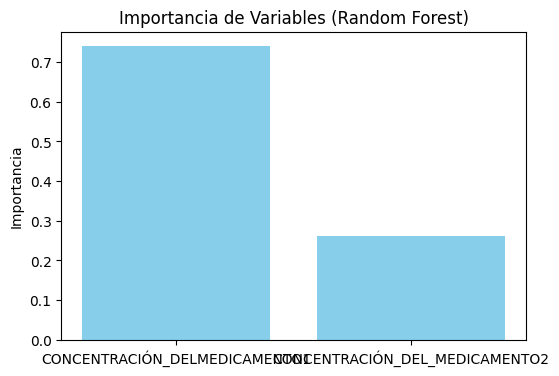

In [24]:
###Selección de variables###
# Usaremos las concentraciones como variables predictoras
X = df_clean[['CONCENTRACIÓN_DELMEDICAMENTO1', 'CONCENTRACIÓN_DEL_MEDICAMENTO2']]
y = df_clean['CANTIDAD_SOLICITADA']

###División en Train/Test###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Entrenamiento del modelo###
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

###Predicciones###
y_pred = model.predict(X_test)

###Evaluación###
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Resultados del Modelo:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.4f}")

###Importancia de Variables###
importances = model.feature_importances_
plt.figure(figsize=(6,4))
plt.bar(X.columns, importances, color='skyblue')
plt.title("Importancia de Variables (Random Forest)")
plt.ylabel("Importancia")
plt.show()

# Reflexion y respuesta a preguntas principales

. Los gráficos con outliers muestran concentraciones o cantidades desproporcionadas en ciertos momentos, lo cual refleja fallas en la planeación y distribución de medicamentos vitales. Esto puede estar ligado a emergencias sanitarias o a una gestión ineficiente.

. Los periodos de ausencia total o caída brusca en los valores sugieren que en varios momentos hubo desabastecimiento crítico, afectando la atención de pacientes que requieren tratamientos urgentes.

. Aun eliminando los outliers, los gráficos no muestran un comportamiento lineal o constante, sino altibajos. Esto refleja que el acceso a los medicamentos vitales en Colombia no ha logrado estabilizarse a lo largo del tiempo.

. Los picos coinciden con periodos cercanos a la pandemia (2019–2021), lo que indica que crisis globales afectan de manera directa la disponibilidad de medicamentos en el país, revelando vulnerabilidad del sistema de salud frente a la dependencia de importaciones.

. El comportamiento de las series temporales evidencia que no existe un mecanismo robusto de previsión de la demanda, lo cual genera tanto exceso puntual de concentración como largos periodos de déficit.

# Conclusiones

 . Podemos observar que la tendencia a empeorado con el paso del tiempo, si bien en comparacion la epoca de pandemia fue peor que en años recientes la alta diferencia entre los puntos mas altos y bajos de las graficas indican que el problema sigue siendo grave, dando pie a situaciones en donde la falta de medicamentos es critica.

 . No, segun los datos la tendencia a empeorado en comparación al sistema previo a la epoca de pandemia, esto se pude observar en los picos mas altos entre 2018-2019 y los de 2024-2025, y es que aunque este segundo periodo sea el mas bajo post-pandemia sigue superando por cientos a las cantidades pre-pandemia.

 . Gracias a los datos y graficas podemos ver como la cantidad de medicamentos varian enormemente entre periodos en los que grandes cantidades de medicinas son innacesibles mientras que en otros periodos la escases es mucho mas baja, indicando una mala gestión.